# MNIST (dígitos) solución tradicional

### Integrantes:

Nombre:
Nombre:
### Números asignados: 7 y 9

## Taller
Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado

Durante la clase se le proporcionaran dos números para trabajar:

1 y 5
8 y 2
9 y 7
0 y 3
4 y 6

### Evaluación del método

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente

Para todos los números que le corresponden

$ Precision = \frac{VP}{VP+FP}$

Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas
Prepare una presentación donde muestre los resultados
Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos

## Paquetes

In [2]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [26]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

## Exploración de los recursos

In [4]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

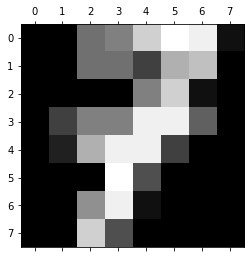

In [184]:
pl.gray() # Queremos las imágenes en grises
prueba=digits.images[7]
pl.matshow(prueba) # Imprimir una imagen dada
print(prueba) # Ver la representacion en pixeles



## Solución


Se decidió implementar un metodo basado en la probabilidad para verificar si una imagen de los datos


In [58]:
import numpy
import random
import time

In [185]:
# matriz modelo para el número siete

modelo_siete=[
    [0,0,16,16,16,16,16,0],
    [0,0,0,0,16,16,16,0],
    [0,0,0,0,0,16,16,0],
    [0,0,0,0,16,16,0,0],
    [0,16,16,16,16,16,16,0],
    [0,0,0,16,16,0,0,0],
    [0,0,16,16,0,0,0,0],
    [0,0,16,16,0,0,0,0]
]


# matriz modelo para el número nueve
modelo_nueve=[
    [0,0,0,0,16,0,0,0],
    [0,0,16,16,16,16,0,0],
    [0,0,16,0,0,16,0,0],
    [0,0,16,0,0,16,0,0],
    [0,0,0,16,16,16,0,0],
    [0,0,0,0,16,16,0,0],
    [0,0,0,16,16,0,0,0],
    [0,0,16,16,0,0,0,0]
]

In [10]:
def filtro(numero):
    diccionario={}
    for i,j in enumerate(digits.target):
        if (digits.target[i]==numero):
            diccionario [i]=digits.images[i]
    return diccionario
    


In [31]:
# metodo para dejar cada pixel como blanco(16) o negro(0) sin valores medios grises
#valor_inflexion valor a partir del cual se considerara un pixel como blanco
def normalizar(matriz,valor_inflexion):
    matriz_norm= numpy.zeros((8,8))
    for f in range(len(matriz)):
        for c in range(len(matriz[f])):
            if (matriz[f][c]>= valor_inflexion):
                matriz_norm[f][c]=16
            else:
                matriz_norm[f][c]=0
    return matriz_norm

In [48]:
prueba_norm=normalizar(prueba,8)
prueba_norm

array([[ 0.,  0.,  0.,  0., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16., 16., 16.,  0.,  0.],
       [ 0.,  0., 16., 16., 16.,  0.,  0.,  0.],
       [ 0.,  0., 16., 16., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 16., 16.,  0.,  0.]])

In [38]:
# metodo para determinar la razon de coincidencia de la representacion "normalizada" 
#con un  modelo de numero establecido
# matriz, representacion normalizada 
# modelo del numero con el cual se quiere comparar
def porcentaje_coincidencia(matriz,modelo):
    count=0
    for f in range(len(matriz)):
        for c in range(len(matriz[f])):
            if (matriz[f][c]==modelo[f][c]):
                count+=1
    return count/64

In [50]:
print(porcentaje_coincidencia(prueba_norm,modelo_siete))
print(porcentaje_coincidencia(prueba_norm,modelo_nueve))

0.609375
0.640625


In [77]:
def obtenerMuestra ():
    muestra={}
    contador7=0
    contador9=0
    for i in range(539):
        r=random.randint(0,1792)
        muestra[i]=i,[digits.target[r],digits.images[r]]
        if(digits.target[r]==7):
            contador7+=1
        if(digits.target[r]==9):
            contador9+=1       
    return muestra, contador7, contador9

In [116]:
def posibleAceptado(matriznorm,porcentaje_aceptacion,modelo):
    return (porcentaje_coincidencia(matriznorm,modelo)>=porcentaje_aceptacion)

In [129]:
def evaluacion(una_muestra,reales_nueve,reales_siete,valor_inflexion,porcentaje_aceptacion):
    tiempo_inicio= time.time()
    estimados_siete=0
    estimados_nueve=0
    FP=0
    VP=0
    precision=0
    for i in una_muestra:
        valor_real=muestra.get(i)[1][0]
        valor_estimado=-1
        matriznorm=normalizar(muestra.get(i)[1][1],valor_inflexion)
        #calculo la posibilidad de que sea cada numero
        posibilidad_siete=porcentaje_coincidencia(matriznorm,modelo_siete)
        posibilidad_nueve=porcentaje_coincidencia(matriznorm,modelo_nueve)
        posibilidad_final=-1 
        #tomo el de mayor posibilidad
        if(posibilidad_siete>posibilidad_nueve):
            posibilidad_final=posibilidad_siete
            valor_estimado=7
        elif(posibilidad_siete<posibilidad_nueve):
            posibilidad_final=posibilidad_nueve
            valor_estimado=9
        # comparo si el de mayor posibilidad pasa el parametro de aceptacion e identifico si fue una identificacion correcta
        if(posibilidad_final>=porcentaje_aceptacion):
            if(valor_estimado==valor_real): # si el valor estimado es igual al real sumo a los correctos del numero correspondiente
                if(valor_estimado==7):
                    estimados_siete+=1
                elif(valor_estimado==9):
                    estimados_nueve+=1
            else:#si el valor estimado no es igual al real fail+1
                FP+=1
        elif( valor_real == 7 or valor_real==9):#si el valor real era 9 o 7, pero el programa no los indentifico fail+1
            FP+=1
        else:
            VP+=1
    VP+=estimados_siete+estimados_nueve
    precision=VP/(VP+FP)
    tiempo_fin= time.time()
    
    return estimados_siete,estimados_nueve,VP,FP,precision,tiempo_inicio,tiempo_fin

In [81]:
muestra,totalsiete,totalnueve=obtenerMuestra()   

In [194]:
bien_estimados_siete,bien_estimados_nueve,vp,fp,precision,t_ini,t_fin=evaluacion(muestra,totalnueve,totalsiete,4,0.75)
tiempo=t_fin-t_ini

In [195]:
report= "Total Sietes(7) Reales: {} \n Sietes Bien estimados: {} \n Total nueves(9) Reales: {} \n Nueves Bien estimados: {} \n VP: {}\n FP: {}\n Precision: {} \n Tiempo Requerido: {}".format(totalsiete,bien_estimados_siete,totalnueve,bien_estimados_nueve,vp,fp,precision,tiempo)
print(report)
len(muestra)

Total Sietes(7) Reales: 42 
 Sietes Bien estimados: 17 
 Total nueves(9) Reales: 55 
 Nueves Bien estimados: 20 
 VP: 323
 FP: 216
 Precision: 0.5992578849721707 
 Tiempo Requerido: 0.14499950408935547


539